In [5]:
import matplotlib.pyplot as plt
import torch
torch.__version__

'2.1.0+cu121'

In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

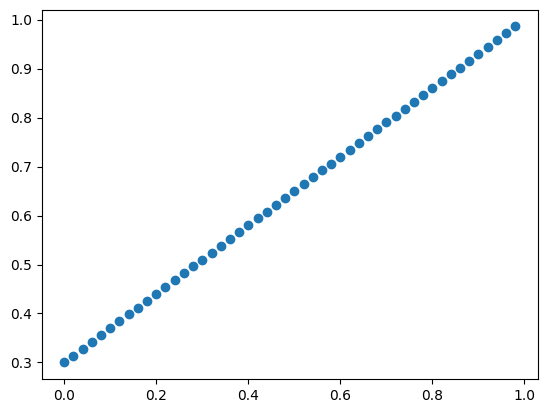

In [8]:
plt.scatter(X,y)
plt.show()

In [4]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [13]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(8, 4))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

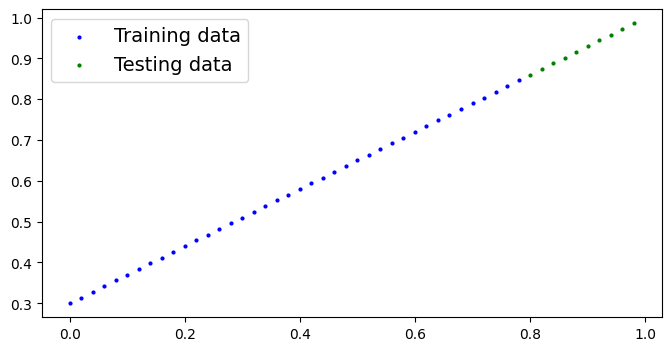

In [14]:
plot_predictions();

In [31]:
class LinearRegression(torch.nn.Module):
  def __init__(self):
    super().__init__()

    # weight
    self.weight = torch.nn.Parameter(torch.rand(1, requires_grad=True, dtype=float))

    # bias
    self.bias = torch.nn.Parameter(torch.rand(1, requires_grad=True, dtype=float))

  def forward(self, x):
    return x * self.weight + self.bias

In [36]:
# seed
torch.manual_seed(41)

# model
model = LinearRegression()
print(model.state_dict())

OrderedDict([('weight', tensor([0.8916], dtype=torch.float64)), ('bias', tensor([0.4042], dtype=torch.float64))])


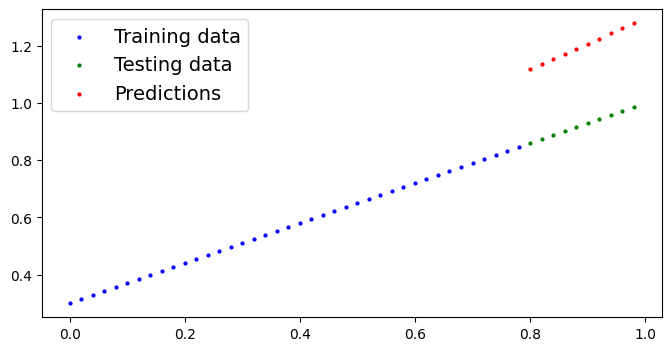

In [37]:
with torch.inference_mode():
  y_pred_0 = model(X_test)

# plot prediction
plot_predictions(predictions=y_pred_0)

In [39]:
# loss - MAE
loss_l1 = torch.nn.L1Loss()

# optimizer - SGD
optimizer = torch.optim.SGD(params=model.parameters(), lr=1e-3)

In [44]:
train_loss = []
test_loss = []

for epoch in range(500):
  # set the model to training mode
  model.train()

  # get prediciton on training data
  y_pred = model(X_train)

  # get training loss
  loss = loss_l1(y_train, y_pred)

  # set optimizer gradient to 0
  optimizer.zero_grad()

  # calculate the gradients
  loss.backward()

  # update the optimizer parameters
  optimizer.step()

  with torch.inference_mode():
    # predict with test data
    y_pred_test = model(X_test)
    loss_test = loss_l1(y_test, y_pred_test)

    # append loss
    test_loss.append(loss_test)
    train_loss.append(loss)

    # print the process
    if epoch % 50 == 0:
      print(f'Epoch {epoch}: train-loss: {loss}, test-loss: {loss_test}')

Epoch 0: train-loss: 0.06374454495051042, test-loss: 0.13868313473963748
Epoch 50: train-loss: 0.03125274486652539, test-loss: 0.08817833491378217
Epoch 100: train-loss: 0.024291328110732837, test-loss: 0.0645829850596719
Epoch 150: train-loss: 0.02194027136569794, test-loss: 0.053747935175344444
Epoch 200: train-loss: 0.02018336018818134, test-loss: 0.04810233530908277
Epoch 250: train-loss: 0.018446839336357365, test-loss: 0.04307316544105022
Epoch 300: train-loss: 0.016729297410158016, test-loss: 0.0390743455672687
Epoch 350: train-loss: 0.015012360444628486, test-loss: 0.03500683569387049
Epoch 400: train-loss: 0.013295520528926524, test-loss: 0.031008015820089007
Epoch 450: train-loss: 0.011578332631754501, test-loss: 0.027009195946307553


In [45]:
# print the optimized parameters
model.state_dict()

OrderedDict([('weight', tensor([0.7491], dtype=torch.float64)),
             ('bias', tensor([0.2794], dtype=torch.float64))])

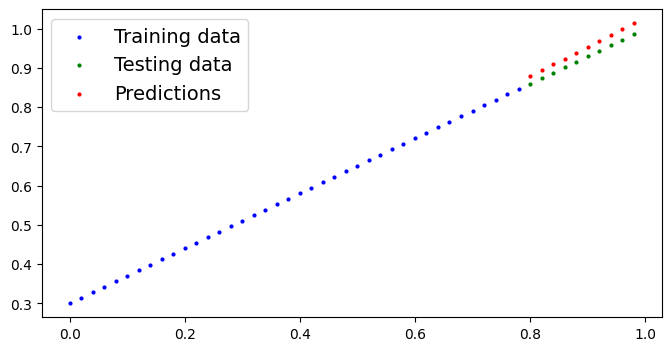

In [47]:
# set the model to evaluation mode
model.eval()

with torch.inference_mode():
  y_pred_1 = model(X_test)

# plot
plot_predictions(predictions=y_pred_1)

In [49]:
# save the model
torch.save(model.state_dict(), 'model.pt')

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])


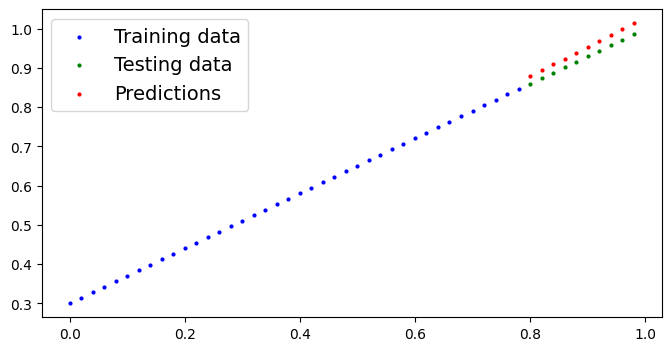

In [50]:
# load the model
model_loaded = LinearRegression()
model_loaded.load_state_dict(torch.load('model.pt'))

# check the loaded model
model_loaded.eval()

with torch.inference_mode():
  y_pred_loaded = model_loaded(X_test)

# check if it is the same as before
print(y_pred_1 == y_pred_loaded)

# plot
plot_predictions(predictions=y_pred_loaded)

# Putting it all together

device=cuda


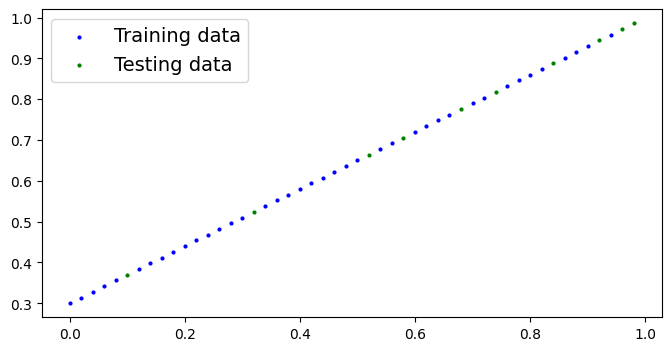

In [3]:
import matplotlib.pyplot as plt
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'device={device}')

# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing

idx = torch.randperm(X.shape[0])
X_shuffled = X[idx].view(X.size())
y_shuffled = y[idx].view(y.size())
X_train, y_train = X_shuffled[:train_split], y_shuffled[:train_split]
X_test, y_test = X_shuffled[train_split:], y_shuffled[train_split:]

# X_train, y_train = X[:train_split], y[:train_split]
# X_test, y_test = X[train_split:], y[train_split:]

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(8, 4))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

# plot the loaded data
plot_predictions();

In [4]:
class LinearRegression2(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_params = torch.nn.Linear(1, 1, device=device)

  def forward(self, x):
    return self.linear_params(x)

# create a model
model = LinearRegression2()
print(model.state_dict())

# change model device
model.to(device)

OrderedDict([('linear_params.weight', tensor([[0.2877]], device='cuda:0')), ('linear_params.bias', tensor([-0.4428], device='cuda:0'))])


LinearRegression2(
  (linear_params): Linear(in_features=1, out_features=1, bias=True)
)

Epoch 0: loss - 1.0036085844039917
Epoch 1000: loss - 0.007749584503471851
Epoch 2000: loss - 0.007749584503471851
Epoch 3000: loss - 0.007749584503471851
Epoch 4000: loss - 0.007749584503471851


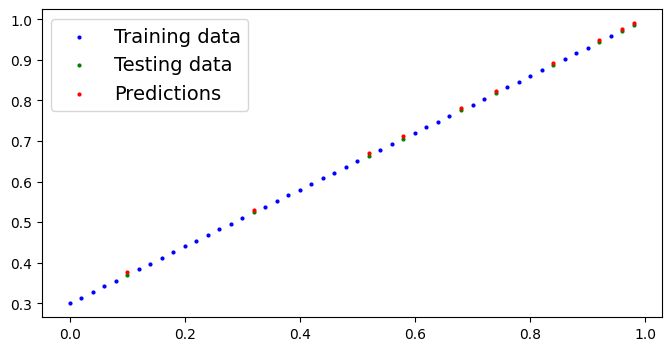

In [5]:
# optimizer
optimizer = torch.optim.SGD(params=model.parameters(), lr=1e-2)

# loss
loss = torch.nn.L1Loss()

# change the data device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

# train
for epoch in range(5000):
  # train mode
  model.train()

  # predict on train set
  y_predict_train = model(X_train)

  # get loss
  loss_train = loss(y_train, y_predict_train)

  # zero optimizer
  optimizer.zero_grad()

  # get gradient
  loss_train.backward()

  # update optimizer
  optimizer.step()

  if epoch % 1000 == 0:
    with torch.inference_mode():
      # predict on test set
      y_predict_test = model(X_test)

      # find loss
      loss_test = loss(y_test, y_predict_test)
      print(f"Epoch {epoch}: loss - {loss_test}")

# evaluate
model.eval()

with torch.inference_mode():
  y_predict = model(X_test)

# plot
plot_predictions(predictions=y_predict.cpu())

In [6]:
# save
torch.save(model.state_dict(), 'model.pt')

# load
model_loaded = LinearRegression2()
model_loaded.load_state_dict(torch.load('model.pt'))

# check
model_loaded.eval()

with torch.inference_mode():
  y_predict_loaded = model_loaded(X_test)

print(y_predict_loaded == y_predict)

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')
